### Preprocessing

In [1]:
import os
os.chdir("..")

In [2]:
import pandas as pd
import numpy as np
import importlib, glob, pickle, torch, logging
from datetime import datetime
from concurrent import futures
from tqdm import tqdm

from src.data.insert_ids import insert_ids_in_folder
from src.data.rename_logos import rename_logos
from src.data.get_svg_meta_data import get_svg_meta_data
from src.data.generate_random_animations import random_animation_vector
from src.data.expand_viewbox import expand_viewbox_in_folder

from src.preprocessing.sort_paths import sort_by_relevance
from src.preprocessing.decompose_logo import decompose_logos_in_folder
from src.preprocessing.create_svg_embedding import _load_model, apply_embedding_model_to_svgs, combine_embeddings, encode_svg, decode_z
from src.preprocessing.deepsvg.svglib.svg import SVG
from src.preprocessing.deepsvg import utils

from src.features.get_style_attributes import *

from src.models_output.insert_animation import create_animated_svg
from src.models_output.transform_animation_predictor_output import transform_animation_predictor_output

#### 1 Rename and insert IDs in SVGs
Logos are renamed and an ID called animation_id is inserted for every path in a SVG.

In [8]:
expand_viewbox_in_folder('data/initial_svgs', 50, "data/svgs_expanded")

In [3]:
rename_logos("data/truncated_svgs_new", "data/truncated_svgs_new_renamed")

In [4]:
insert_ids_in_folder("data/svgs_expanded_renamed", "data/svgs")

#### 2 Decompose SVGs
Decompose SVGs by saving every path in a seperate SVG file. Decomposed SVGs are save to data/decomposed_svgs.

In [4]:
decompose_logos_in_folder("data/truncated_svgs_new")

#### 3 Simplify SVGs
Creates simplified SVGs and its tensors on SVG and path level  
###### UPDATE: NOT NEEDED ANYMORE

In [6]:
#preprocess_folder(data_folder="data/svgs")

In [7]:
#preprocess_folder(data_folder="data/decomposed_svgs")

#### 4 Get SVGs Metadata

In [3]:
pd.set_option('display.max_rows', None)

In [3]:
#meta_data = get_svg_meta_data("data/truncated_svgs")
#meta_data

In [5]:
meta_data.to_csv("data/meta_data/truncated_svgs_meta.csv", index=False)

In [5]:
output = open("data/meta_data/svgs_metadata.csv", 'wb')
pickle.dump(meta_data, output)
output.close()

#### 5 Get Path Embeddings
Apply hierarchical generative network to produce latent vector z

In [8]:
model = "models/hierarchical_ordered.pth.tar"

In [ ]:
apply_embedding_model_to_svgs(data_folder="data/decomposed_svgs", split_paths=True, save=True)

  0%|▏                                                                               | 18/8470 [00:01<27:10,  5.18it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


  1%|▉                                                                              | 101/8470 [00:08<14:52,  9.38it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


  4%|███▎                                                                           | 357/8470 [00:30<16:12,  8.34it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


  5%|███▌                                                                           | 385/8470 [00:33<14:54,  9.04it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


  5%|███▊                                                                           | 411/8470 [00:37<20:35,  6.52it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 15%|███████████▊                                                                  | 1277/8470 [02:28<16:24,  7.31it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 19%|██████████████▉                                                               | 1616/8470 [03:24<36:28,  3.13it/s]

SVG L_7sins_01_1 has more than 30 segments.


 19%|███████████████                                                               | 1629/8470 [03:28<34:46,  3.28it/s]

SVG L_7sins_01_1 has more than 30 segments.


 19%|███████████████                                                               | 1636/8470 [03:29<18:52,  6.03it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.
SVG L_7sins_01_1: Path nr 1 has more than 30 segments.


 20%|███████████████▏                                                              | 1652/8470 [03:33<18:31,  6.13it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.
SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 20%|███████████████▎                                                              | 1656/8470 [03:35<35:22,  3.21it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 20%|███████████████▍                                                              | 1683/8470 [03:40<26:54,  4.20it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 20%|███████████████▋                                                              | 1698/8470 [03:43<20:12,  5.59it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 25%|███████████████████▍                                                          | 2106/8470 [04:51<11:05,  9.56it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 26%|████████████████████▎                                                         | 2208/8470 [05:01<12:14,  8.52it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 26%|████████████████████▎                                                         | 2212/8470 [05:02<28:53,  3.61it/s]

SVG L_7sins_01_1 has more than 30 segments.
SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 26%|████████████████████▍                                                         | 2219/8470 [05:04<29:22,  3.55it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.
SVG L_7sins_01_1: Path nr 1 has more than 30 segments.


 26%|████████████████████▍                                                         | 2226/8470 [05:05<24:37,  4.22it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 28%|█████████████████████▊                                                        | 2371/8470 [05:19<09:55, 10.25it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 28%|██████████████████████                                                        | 2394/8470 [05:20<08:06, 12.49it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.
SVG L_7sins_01_1 has more than 30 segments.
SVG L_7sins_01_1: Path nr 0 has more than 30 segments.
SVG L_7sins_01_1: Path nr 1 has more than 30 segments.


 28%|██████████████████████                                                        | 2400/8470 [05:22<18:45,  5.40it/s]

SVG L_7sins_01_1 has more than 30 segments.


 28%|██████████████████████                                                        | 2402/8470 [05:23<16:28,  6.14it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 29%|██████████████████████▍                                                       | 2437/8470 [05:27<25:01,  4.02it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 29%|██████████████████████▊                                                       | 2480/8470 [05:33<15:35,  6.40it/s]

SVG L_7sins_01_1 has more than 30 segments.
SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 29%|██████████████████████▉                                                       | 2497/8470 [05:34<08:28, 11.74it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.
SVG L_7sins_01_1: Path nr 1 has more than 30 segments.


 30%|███████████████████████                                                       | 2505/8470 [05:35<08:16, 12.02it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.
SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 30%|███████████████████████▊                                                      | 2583/8470 [05:42<09:24, 10.43it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 32%|████████████████████████▊                                                     | 2694/8470 [05:50<07:39, 12.56it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 34%|██████████████████████████▏                                                   | 2838/8470 [06:02<08:28, 11.08it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 35%|███████████████████████████▌                                                  | 2994/8470 [06:13<06:58, 13.07it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.
SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 35%|███████████████████████████▌                                                  | 2998/8470 [06:13<08:30, 10.71it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 35%|███████████████████████████▋                                                  | 3002/8470 [06:14<09:21,  9.75it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 35%|███████████████████████████▋                                                  | 3006/8470 [06:15<29:35,  3.08it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.
SVG L_7sins_01_1 has more than 30 segments.
SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 36%|████████████████████████████                                                  | 3043/8470 [06:17<07:03, 12.83it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 38%|█████████████████████████████▍                                                | 3190/8470 [06:27<09:08,  9.63it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 38%|█████████████████████████████▍                                                | 3193/8470 [06:27<08:55,  9.85it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 39%|██████████████████████████████                                                | 3262/8470 [06:32<07:02, 12.33it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 41%|███████████████████████████████▊                                              | 3458/8470 [06:48<15:15,  5.47it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 46%|████████████████████████████████████▎                                         | 3937/8470 [07:21<06:48, 11.09it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 48%|█████████████████████████████████████▍                                        | 4063/8470 [07:29<06:18, 11.63it/s]

SVG L_7sins_01_1 has more than 30 segments.


 48%|█████████████████████████████████████▌                                        | 4077/8470 [07:30<06:44, 10.87it/s]

SVG L_7sins_01_1 has more than 30 segments.


 49%|██████████████████████████████████████▏                                       | 4153/8470 [07:37<06:10, 11.65it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 50%|███████████████████████████████████████▍                                      | 4276/8470 [07:46<05:56, 11.78it/s]

SVG L_7sins_01_1 has more than 30 segments.


 52%|████████████████████████████████████████▏                                     | 4365/8470 [07:56<07:38,  8.95it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 53%|█████████████████████████████████████████▍                                    | 4494/8470 [08:05<06:51,  9.65it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 53%|█████████████████████████████████████████▌                                    | 4509/8470 [08:07<05:39, 11.66it/s]

SVG L_7sins_01_1 has more than 30 segments.


 56%|███████████████████████████████████████████▊                                  | 4756/8470 [08:27<08:48,  7.03it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 57%|████████████████████████████████████████████                                  | 4789/8470 [08:30<14:49,  4.14it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.
SVG L_7sins_01_1: Path nr 0 has more than 30 segments.
SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 57%|████████████████████████████████████████████▏                                 | 4799/8470 [08:32<10:31,  5.81it/s]

SVG L_7sins_01_1 has more than 30 segments.
SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 57%|████████████████████████████████████████████▏                                 | 4803/8470 [08:32<07:56,  7.70it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.
SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 57%|████████████████████████████████████████████▎                                 | 4811/8470 [08:33<07:03,  8.65it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.
SVG L_7sins_01_1: Path nr 0 has more than 30 segments.SVG L_7sins_01_1: Path nr 0 has more than 30 segments.



 57%|████████████████████████████████████████████▋                                 | 4848/8470 [08:39<09:00,  6.71it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 57%|████████████████████████████████████████████▊                                 | 4860/8470 [08:40<08:15,  7.29it/s]

SVG L_7sins_01_1 has more than 30 segments.
SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 57%|████████████████████████████████████████████▊                                 | 4870/8470 [08:41<10:30,  5.71it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 58%|████████████████████████████████████████████▉                                 | 4883/8470 [08:44<16:46,  3.56it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 58%|█████████████████████████████████████████████                                 | 4889/8470 [08:44<10:13,  5.84it/s]

SVG L_7sins_01_1: Path nr 0 has more than 30 segments.
SVG L_7sins_01_1: Path nr 0 has more than 30 segments.


 58%|█████████████████████████████████████████████▏                                | 4909/8470 [08:47<06:54,  8.59it/s]

In [10]:
with open('data/embeddings/hierarchical_ordered_decomposed_svgs_embedding.pkl', 'rb') as f:
    path_embedding = pickle.load(f)

In [15]:
path_embedding["logo_nr"] = path_embedding['filename'].apply(lambda x: int(x.split("_")[-1]))

In [24]:
test = path_embedding[path_embedding['logo_nr'] > 191].set_index(["filename", "animation_id"]).count(level="filename")[[0]]

In [26]:
test[test[0]<8]

,0
filename,
logo_211,6
logo_238,4
logo_402,7
logo_408,7
logo_525,7


In [33]:
# logo_211, 6, 7
# logo 238, 0, 5, 6, 7
# logo 402, 0
# logo 408, 7
# logo 525, 7
path_embedding[path_embedding["filename"].isin(["logo_211", "logo_238", "logo_402", "logo_408", "logo_525"])].sort_values(by=['filename', 'animation_id'])

,filename,animation_id,0,1,2,3,4,5,6,7,...,247,248,249,250,251,252,253,254,255,logo_nr
2168,logo_211,0,-0.141575,-0.055171,-0.337779,2.568222,-0.617787,1.685873,1.251307,-1.128682,...,0.887984,-0.522505,-0.592454,-0.766932,-0.199072,-1.042801,0.978343,0.226573,-0.671815,211
2171,logo_211,1,0.086047,1.023730,-0.440462,2.682851,-1.384562,1.234081,1.265141,-0.701777,...,0.532326,-0.613685,-1.193270,-0.434390,-0.389144,-1.502147,0.285991,0.336075,0.373088,211
2170,logo_211,2,-1.724599,1.079462,-0.405891,-0.242789,-0.963871,-1.021275,1.343340,-0.299524,...,0.664960,0.292224,-0.996706,-1.105466,-0.296502,-0.206508,1.403386,1.238778,0.475196,211
2169,logo_211,3,-1.829167,1.294984,-0.535648,-0.221806,-1.249388,-0.587495,1.396573,-0.213703,...,0.243210,0.296332,-0.676962,-0.647738,-0.568061,-0.148159,1.012232,0.981920,0.608049,211
2172,logo_211,4,-1.958844,1.570214,-0.779611,0.461741,-1.288026,-0.650501,1.765192,-0.497856,...,1.284373,0.130796,-1.369725,-1.221900,-0.182090,-0.338793,1.441785,1.055960,0.424195,211
2173,logo_211,5,-0.203867,-0.943169,1.048446,0.556130,-0.344688,1.153693,-1.088782,-0.858588,...,-0.949288,-0.833965,1.120942,0.593243,-0.736097,-0.802733,-0.216042,0.009321,0.398781,211
2401,logo_238,1,-0.827878,-0.017904,-0.627257,2.805572,-0.427471,1.288770,0.902441,-1.126604,...,1.570567,-0.799238,-1.119782,-0.859737,-0.032440,-1.011399,1.155287,-0.331138,-0.062800,238
2399,logo_238,2,-1.785931,1.325570,-0.512051,-0.206252,-1.172468,-0.694118,1.598846,-0.124511,...,0.449437,0.290768,-0.528530,-0.747189,-0.429704,-0.077103,1.078949,1.391016,0.531088,238
2403,logo_238,3,-1.941530,1.295736,-0.625692,0.105442,-1.314487,-0.661948,1.302338,-0.507842,...,0.631683,0.329040,-1.432978,-0.999300,-0.527212,-0.318049,1.293519,0.477116,0.622697,238
2402,logo_238,4,-1.914025,1.552628,-0.698892,0.305012,-1.368692,-0.411464,1.742702,-0.324388,...,0.866864,0.143791,-0.925410,-0.875961,-0.395529,-0.228372,1.101507,1.082556,0.500942,238


In [18]:
path_embedding[path_embedding['logo_nr'] > 191]

,filename,animation_id,0,1,2,3,4,5,6,7,...,247,248,249,250,251,252,253,254,255,logo_nr
1988,logo_192,0,-0.453717,-0.374420,-0.627612,2.578623,-0.830086,1.759194,0.300884,-1.094819,...,0.226278,-0.717877,-0.299382,-0.110605,-0.362834,-1.193178,0.562870,-0.223981,-0.076383,192
1992,logo_192,1,0.015715,-0.412419,-0.574048,2.759139,-0.698303,2.475586,0.917700,-0.766752,...,0.078055,-0.778739,-0.021252,0.180203,-0.530318,-0.689125,0.583822,-0.377453,-0.735054,192
1993,logo_192,2,-0.028710,0.652030,-0.366142,2.791611,-1.057021,1.569561,1.540501,-0.682512,...,0.043242,-1.202920,-0.671364,-0.360040,-0.429926,-1.271610,0.474472,0.582728,-0.149055,192
1994,logo_192,3,-0.087036,0.781235,-0.392705,2.704441,-1.025391,1.293916,1.688568,-0.726301,...,0.445015,-1.041461,-0.808081,-0.631364,-0.342838,-1.256719,0.602538,0.820578,-0.101001,192
1995,logo_192,4,-0.065252,-0.067573,-0.497587,2.746766,-0.434192,1.996112,1.206143,-0.697011,...,0.997651,-0.973325,-0.067528,-0.200911,-0.079918,-0.714284,0.459687,0.357612,-0.387528,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7265,logo_612,3,0.279548,0.053661,-0.796544,2.775322,-0.676086,2.243988,1.445447,-0.862413,...,1.236926,-0.683921,-0.444223,-0.356109,-0.178829,-0.791651,0.481077,-0.045297,-0.588702,612
7266,logo_612,6,-1.946193,1.357715,-0.671436,0.173746,-1.222170,-0.780411,1.504731,-0.536600,...,0.970126,0.300721,-1.422934,-1.178472,-0.353500,-0.256381,1.430993,0.811205,0.488219,612
7267,logo_612,5,0.015238,-0.419390,2.082367,0.053546,-0.813023,0.931354,0.257520,0.479984,...,-1.763929,-0.963529,1.351143,0.399445,-1.323053,0.300055,-0.566407,1.486786,0.175284,612
7268,logo_612,4,-1.986624,1.464469,-0.727852,0.467393,-1.375947,-0.635734,1.527494,-0.617282,...,1.089544,0.295930,-1.676055,-1.212001,-0.382430,-0.403471,1.437989,0.546646,0.551742,612


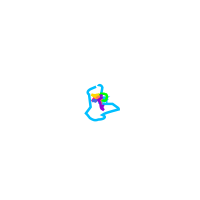

In [8]:
file = "data/decomposed_svgs/logo_37_0.svg"
z = encode_svg(filename = file, data_folder="data/decomposed_svgs", split_paths=True)
decode_z(z)

In [7]:
path_embedding[path_embedding["filename"]=="logo_37"]

,filename,animation_id,0,1,2,3,4,5,6,7,...,246,247,248,249,250,251,252,253,254,255
3347,logo_37,1,0.767400,-0.721387,1.061528,0.003936,-0.763221,0.946376,-0.584684,0.155355,...,-0.706007,-4.024151,-0.781994,2.090312,1.655304,-1.582091,-0.877338,-0.383140,1.191025,0.626104
3348,logo_37,0,-0.710858,0.744055,0.604283,-0.035496,-0.304608,-0.678038,-1.810309,0.697621,...,-1.468121,-2.331798,0.060613,-0.708045,1.078953,-0.127769,-0.512694,-0.213201,-0.861069,0.867309
3349,logo_37,2,0.934483,-1.500365,0.345049,1.193101,-0.222080,2.321496,-0.127838,-0.189523,...,0.653853,-2.367182,-0.568107,2.244652,1.323835,-0.971887,-0.233364,-0.033162,0.490277,-0.548831
3350,logo_37,3,0.862654,0.758955,1.207540,0.280837,-1.033720,-0.889414,-0.064494,0.627098,...,0.059904,-3.522466,-0.796674,0.659970,0.703120,-1.381968,-1.048746,-1.082791,1.963104,1.536288
3351,logo_37,4,0.630766,-1.830302,1.038555,-0.023010,-0.236880,0.335377,-2.143478,-0.531440,...,-2.428053,-3.670521,0.054944,1.131150,1.300249,-1.577138,-0.730661,0.238648,-0.320419,0.779200
3352,logo_37,5,0.793476,-2.051907,1.719936,-0.361618,0.243178,0.203739,-1.501255,0.374606,...,-1.921426,-4.063417,-0.301340,3.014966,1.535725,-1.325546,0.085466,-0.159113,1.449858,0.658289
3353,logo_37,6,0.850246,-1.144974,1.541483,-0.708322,-0.564767,-0.426352,-1.658954,0.076475,...,-2.104415,-4.333948,-0.517492,0.683827,1.062232,-1.783375,-0.876368,-0.191316,0.220720,1.248753
3354,logo_37,7,1.035041,-1.251371,1.704273,-1.185156,-0.315921,-0.584747,-1.510706,0.406987,...,-2.036280,-4.517684,-0.547289,1.529623,1.251671,-1.724851,-0.447631,-0.477674,1.017210,1.173916
3355,logo_37,8,0.540563,-0.842945,1.218790,-0.034098,-0.839644,-0.613333,-1.526924,-0.492874,...,-2.363260,-3.793921,-0.167508,-0.737174,0.436461,-1.873134,-1.066989,0.249022,-0.674423,1.273058
3356,logo_37,9,0.919371,-1.422635,1.608101,-1.136602,-0.294888,-0.850390,-1.816382,0.138522,...,-2.505407,-4.274692,-0.391622,0.717872,0.927352,-1.753221,-0.555902,-0.126467,0.327340,1.260000


#### 6 Get Truncated SVG Embedding

In [8]:
apply_embedding_model_to_svgs(data_folder="data/truncated_svgs", split_paths=False, save=True)

100%|████████████████████████████████████████████████████████████████████████████████| 192/192 [00:15<00:00, 12.29it/s]


,filename,0,1,2,3,4,5,6,7,8,...,246,247,248,249,250,251,252,253,254,255
0,logo_0,-0.139803,0.517301,-0.216177,-0.224378,0.245434,1.295424,-0.751694,0.979410,-0.085270,...,-0.219360,-1.537408,-0.509325,0.224033,1.331241,0.604090,-0.434301,-0.310489,-0.737527,-0.894298
1,logo_10,0.014481,0.991770,0.440586,-0.211320,-0.179296,0.363853,-0.269891,1.362678,-0.695728,...,-0.587773,-2.270502,-0.187884,0.367311,1.406683,0.218315,0.082198,-0.028952,0.252413,-0.322137
2,logo_1,0.382652,1.325662,1.311528,-0.064719,-0.782713,0.917144,-0.723518,0.891246,-1.482842,...,-0.425215,-3.057231,-0.617269,0.342195,1.086993,0.286118,-0.092350,-0.987957,0.148480,-0.150186
3,logo_100,0.001948,0.060774,0.817412,-1.175098,0.517973,-1.232312,-0.623534,1.221800,0.616293,...,-1.644043,-2.767421,-0.083972,0.314031,0.924318,0.017703,0.671873,-1.140841,0.015591,0.465218
4,logo_101,0.322849,-0.782018,0.222675,0.245687,-0.222568,1.760160,-1.393791,1.284999,0.067373,...,-1.133171,-2.162712,-0.309598,1.302865,2.054115,-1.038654,0.044368,-0.353557,-0.675948,-0.673563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,logo_94,0.554916,0.966286,0.399162,0.090689,0.247119,-0.895295,-0.536079,0.829561,-0.274277,...,-0.235139,-1.654074,0.445131,-0.942813,0.501560,-0.255918,0.526573,-0.496769,-0.137688,0.594756
188,logo_96,1.352827,1.692985,0.016531,0.428921,-0.567170,0.695044,1.154331,0.877085,-1.598299,...,1.062907,-1.508039,1.016259,0.003275,1.068140,-0.095732,0.436575,0.260033,0.244037,-0.288786
189,logo_95,0.332031,0.927773,0.001991,0.215348,0.127213,-1.141315,-0.564558,1.094241,-0.433303,...,0.544663,-1.499968,0.184478,-1.318667,0.346078,-0.583003,0.230270,-0.692683,-0.386916,0.355028
190,logo_98,0.625203,0.970013,0.349928,0.179380,-0.471530,1.241775,0.090893,0.238759,-0.604534,...,0.321055,-0.989886,0.801984,0.035731,0.911039,-0.243607,0.503264,-0.058393,-0.635538,-0.226448


In [9]:
with open('data/embeddings/truncated_svg_embedding.pkl', 'rb') as f:
    truncated_svg_embedding = pickle.load(f)

In [10]:
truncated_svg_embedding["logo_id"] = truncated_svg_embedding["filename"].apply(lambda l: int(l.split("_")[-1]) )

In [11]:
truncated_svg_embedding.sort_values(by=['logo_id'])

,filename,0,1,2,3,4,5,6,7,8,...,247,248,249,250,251,252,253,254,255,logo_id
0,logo_0,-0.319286,0.768348,-0.230691,0.507367,-0.075261,1.508813,-0.912999,0.675434,-0.001406,...,-1.237188,-0.534437,-0.611804,1.196366,0.697434,-0.608996,-0.137433,-1.429938,-0.784427,0
2,logo_1,0.336720,1.501473,1.169257,0.030017,-0.814627,1.051143,-0.441092,0.991913,-1.523129,...,-2.788134,-0.738329,0.469090,1.012248,0.454091,-0.068043,-1.105730,0.461207,-0.313481,1
96,logo_4,1.026601,0.503723,0.393026,-0.463900,0.018286,0.778132,0.000968,0.523557,-1.192480,...,-2.094021,0.937697,1.070840,0.847270,0.806781,0.498334,-0.152665,-0.135112,-0.326979,4
107,logo_5,0.618347,1.313700,0.918294,-0.425941,-0.146768,0.430400,0.306780,2.013381,-1.111060,...,-2.927367,-1.322501,-0.160848,1.673383,0.397928,-0.588335,-0.169742,0.305947,-0.501522,5
116,logo_6,0.640700,1.018042,0.267838,-0.324064,-0.437142,0.850384,0.643671,1.262248,-0.953211,...,-0.923869,-0.737705,0.297321,1.181116,-0.196109,-0.455151,0.263948,0.172333,-0.349800,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,logo_187,1.539024,-0.040631,0.393989,0.319893,-1.290616,0.669674,-0.577846,-0.315150,-1.112488,...,-1.373711,0.187085,0.559191,0.778073,-0.717797,0.360962,-0.202559,-0.279704,0.133265,187
73,logo_188,-0.113772,1.393692,-0.200677,1.206145,-0.995082,1.400655,-0.105506,1.488463,-0.449894,...,-0.163678,-1.674516,0.243883,1.770431,-0.551852,-0.358444,-0.326204,0.229872,-0.020805,188
75,logo_189,0.398498,0.701880,0.372359,-0.059786,-0.335600,0.325044,-0.882167,1.376473,-0.090127,...,-0.969852,0.658988,0.247969,1.414171,-0.646614,0.383088,-0.130043,-0.201297,0.442788,189
76,logo_190,0.985857,-0.084097,0.303740,-0.814396,-0.259730,0.269703,-0.343166,1.259054,-0.882186,...,-2.414949,0.998506,1.311748,1.195492,-0.565383,0.687683,-0.570188,0.339194,-0.100368,190


In [37]:
#file = "data/truncated_svgs/logo_1.svg"
#z = encode_svg(filename = file, data_folder="data/truncated_svgs", split_paths=False)
#decode_z(z)

In [ ]:
with open('../../data/animated_svgs_dataframes/1646_animation_vectors.pkl', 'rb') as f:
        animation_df = pickle.load(f)

#### 7 Get Style Attributes
Get local as well as global style attributes of SVGs.

In [7]:
df_local = get_local_style_attributes("data/svgs")
df_global = get_global_style_attributes("data/svgs")

In [8]:
df_all_style_attributes = combine_style_attributes(df_global, df_local)
df_all_style_attributes

,file,animation_id,class_,fill,stroke,stroke_width,opacity,stroke_opacity
0,L_7sins_01.svg,0,st0,#FABB00,#000000,0,1.0,1.0
1,L_7sins_01.svg,1,st1,#C5007B,#000000,0,1.0,1.0
2,L_7sins_01.svg,2,st2,#EC7404,#000000,0,1.0,1.0
3,L_7sins_01.svg,3,st1,#C5007B,#000000,0,1.0,1.0
4,L_7sins_01.svg,4,st2,#EC7404,#000000,0,1.0,1.0
...,...,...,...,...,...,...,...,...
5095,L_Weidenbachhof_9_2.svg,22,st3,#FFFFFF,#000000,0,1.0,1.0
5096,L_Weidenbachhof_9_2.svg,23,st3,#FFFFFF,#000000,0,1.0,1.0
5097,L_Weidenbachhof_9_2.svg,24,st3,#FFFFFF,#000000,0,1.0,1.0
5098,L_Weidenbachhof_9_2.svg,25,st3,#FFFFFF,#000000,0,1.0,1.0


In [ ]:
#df_all_style_attributes.to_csv("data/style_attributes.csv")

In [ ]:
#output = open("data/style_attributes.pkl", 'wb')
#pickle.dump(df_all_style_attributes, output)
#output.close()

#### 8 Insert Animations

In [5]:
file = "data/svgs/L_7sins_02.svg"
animation_id = sort_by_relevance("data/path_selection/L_7sins_02")

In [6]:
for s in range(200):
    model_output = random_animation_vector(8, seed=s)
    create_animated_svg(file, animation_id, model_output, str(s))